In [1]:
import os
import cv2
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# paths to image files and labels
labels_dir = "./data/annotations/"
images_dir = "./data/images/"
train_test_split = "./data/NewDataInfo.txt"

<h1><font color='red'>Display Samples</font></h1>

Image size: (2448, 2048)


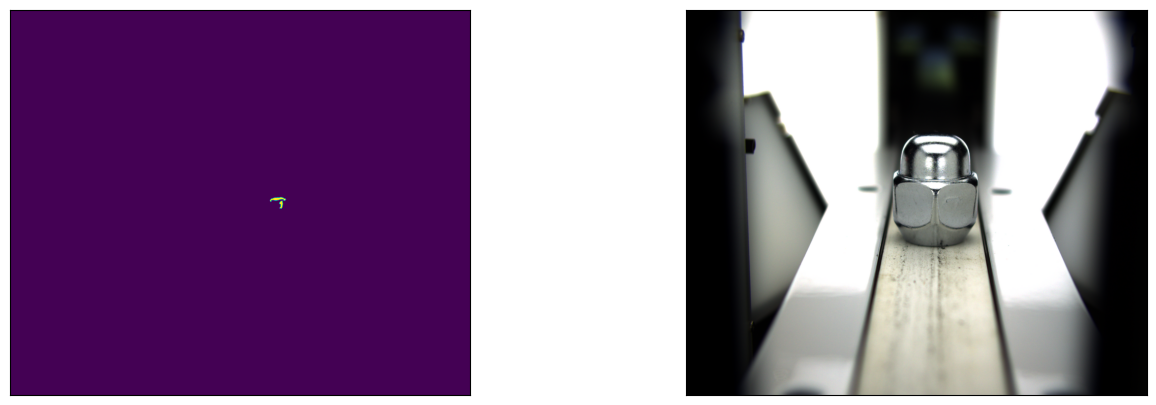

In [3]:
mask = Image.open("./data/masks/122011114270644_5_side2.png")
image = Image.open("./data/images/122011114270644_5_side2.jpg")
print("Image size:", image.size)
to_show = list(map(np.array, [mask, image]))

def visualize(images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, image in enumerate(images):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image)
    plt.show()
visualize(to_show)

In [4]:
with open(train_test_split, "r") as f:
    lines = f.readlines()

train_files = []
test_files = []

for line in lines:
    filename, is_train = line.strip().split()
    if is_train == "True":
        train_files.append(filename)
    else:
        test_files.append(filename)
print("Num. of train files:", len(train_files))
print("Num. of test files:", len(test_files))

Num. of train files: 648
Num. of test files: 4


<h1><font color='red'>Data Exploring</font></h1>

Data Exploring includes understanding the label file and the distribution of labels

In [5]:
def get_distribution(labels_dir):
    """Finds the distribution of defect instances
    
    Args:
        labels_dir (str): path to labels folder
        
    Returns:
        distribution of existing defects
        list of files which do not have any defect
    """
    
    distribution = {}
    no_defect_files = []
    
    for filename in os.listdir(labels_dir):
        with open(f"{labels_dir}/{filename}", "r") as f:
            label = json.load(f)
            instances = label["shapes"]
            
            # check if there is defect or not
            if len(instances) > 0:
                # iterate found defects
                for instance in instances:
                    
                    defect_type = instance["label"]
                    points = instance["points"]
                    
                    if defect_type in distribution:
                        distribution[defect_type] += 1
                    else:
                        distribution[defect_type] = 1
            else:
                # save filenames with no defect
                no_defect_files.append(filename)

    return distribution, no_defect_files

In [6]:
defect_distribution, no_defect_files = get_distribution(labels_dir)

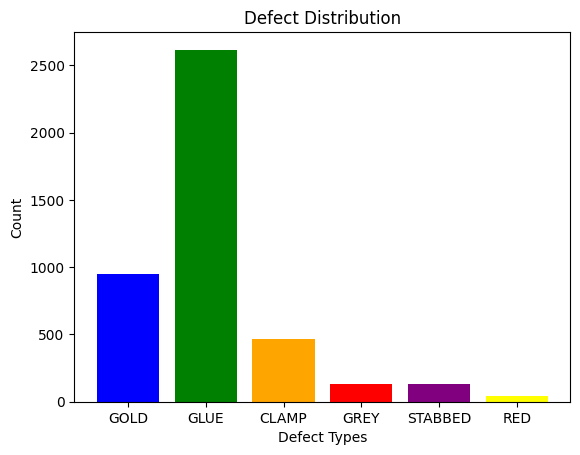

In [7]:
def plot_distribution(distribution):
    keys = distribution.keys()
    values = distribution.values()
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']
    plt.bar(keys, values, color=colors)
    plt.xlabel('Defect Types')
    plt.ylabel('Count')
    plt.title('Defect Distribution')
    plt.show()

plot_distribution(defect_distribution)

### Data Distribution !
(**Class imbalance problem**) From the graph above, it's clear that there are high distribution difference of various defects.

### How to solve ?
- Oversampling
- Undersampling
- **Class weights for loss calculation** (seems more reasonable to me)


In [8]:
def find_roi(labels_dir):
    top_left_x = float("inf")
    top_left_y = float("inf")
    
    bottom_right_x = float("-inf")
    bottom_right_y = float("-inf")
    
    for filename in os.listdir(labels_dir):
        with open(f"{labels_dir}/{filename}", "r") as f:
            label = json.load(f)
            instances = label["shapes"]
            
            # check if there is defect or not
            if len(instances) > 0:
                # iterate found defects
                for instance in instances:
                    
                    defect_type = instance["label"]
                    points = instance["points"]
                    for point in points:
                        x, y = point
                        top_left_x = min(top_left_x, x)
                        top_left_y = min(top_left_y, y)
    
                        bottom_right_x = max(bottom_right_x, x)
                        bottom_right_y = max(bottom_right_y, y)
    return {
        "top_left": (top_left_x, top_left_y),
        "bottom_right": (bottom_right_x, bottom_right_y)
    }

In [9]:
roi = find_roi(labels_dir)
x_min, y_min = roi["top_left"]
x_max, y_max = roi["bottom_right"]

In [10]:
x_min, y_min

(1076.0, 626.0)

In [11]:
x_max, y_max

(1557.0, 1263)

In [12]:
import numpy as np
import cv2

# Create a blank white image
image_size = (2448, 2048, 3)
frame = np.ones(image_size, dtype=np.uint8) * 255

# Draw a rectangle in the center
color1 = (0, 0, 255)  # BGR color format (red)
color2 = (0, 255, 0)
cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color1, thickness=2)
cv2.rectangle(frame, (840, 512), (1640, 1312), color2, thickness=2)

# # Display the image
# cv2.namedWindow('Resizable Window', cv2.WINDOW_NORMAL)
# cv2.imshow('Resizable Window', frame)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

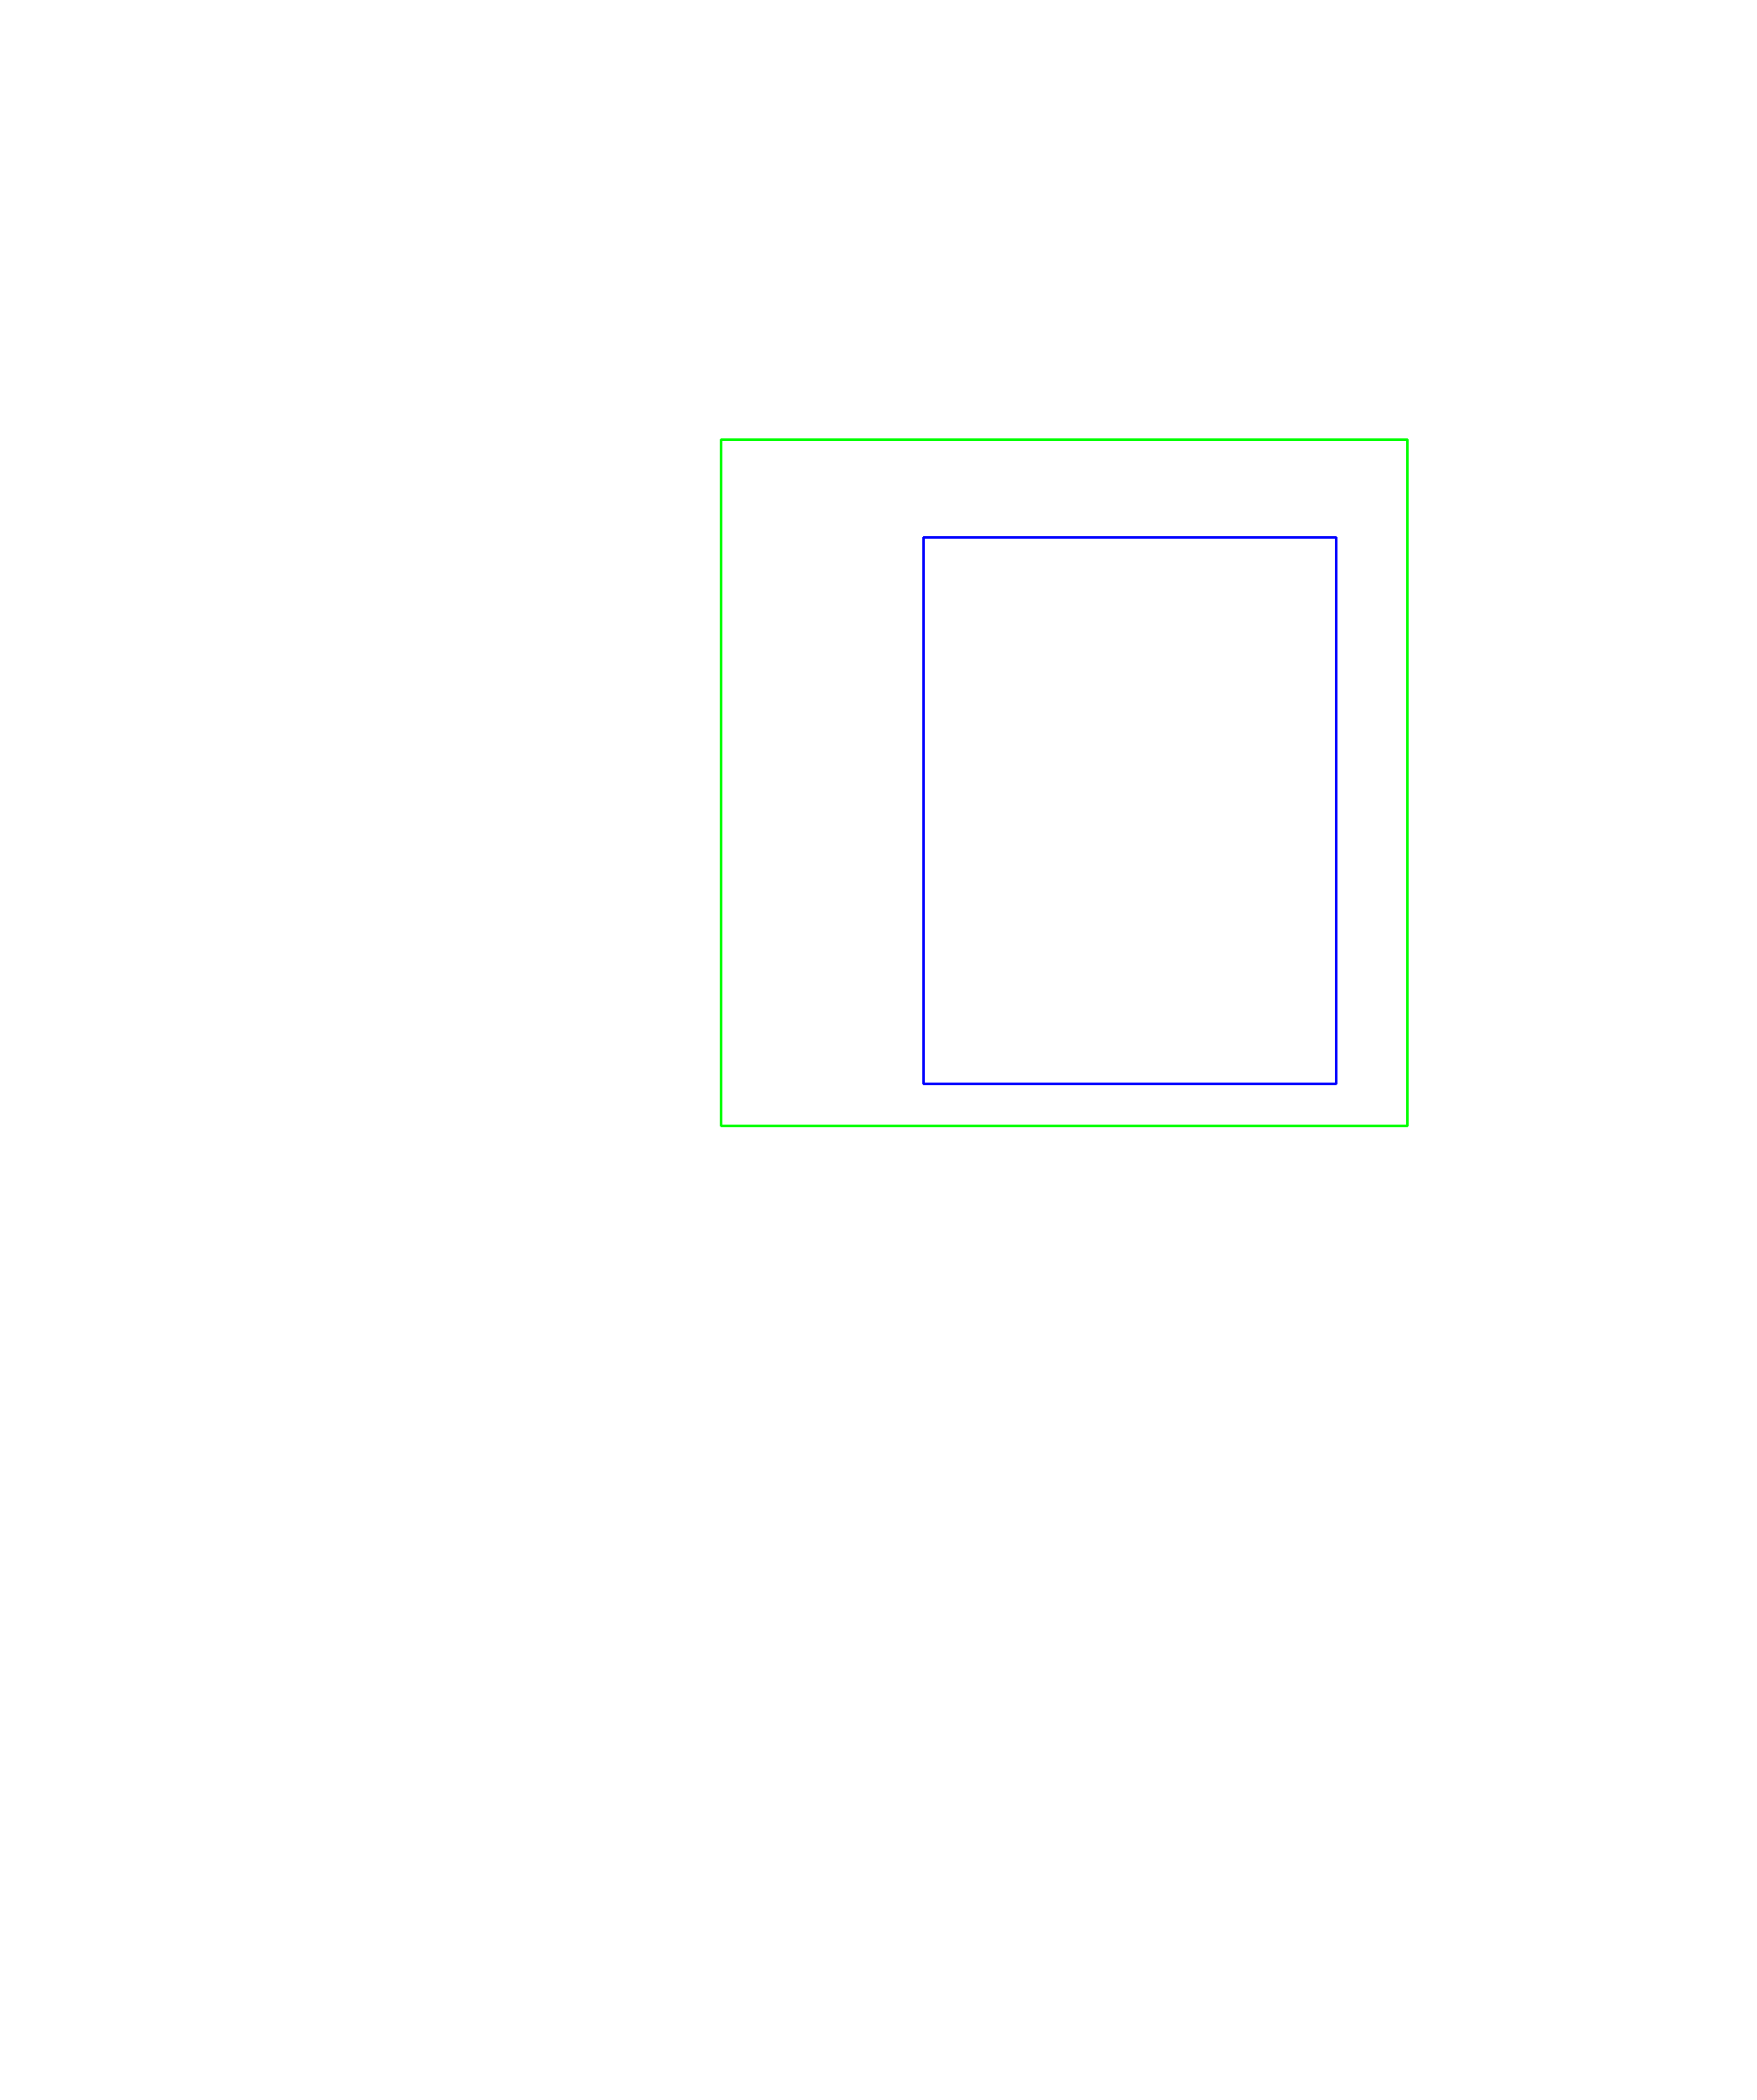

In [13]:
"""
- BLUE rectangle is the Region Of Interest, all of the annotation maps does not exceed from
that area.

- GREEN rectangle can be area of cropping images and corresponding masks.
"""
frame_pil = Image.fromarray(frame)
frame_pil

In [14]:

defect_distribution

{'GOLD': 950,
 'GLUE': 2617,
 'CLAMP': 465,
 'GREY': 129,
 'STABBED': 129,
 'RED': 44}